# Linear Algebra

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

(-0.1, 3.1)

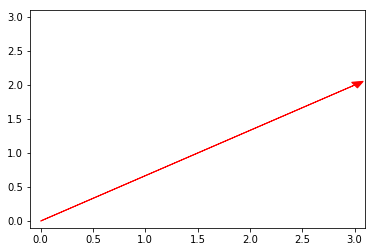

In [15]:
a = np.array([[3], [2]])

plt.arrow(0, 0, a[0][0], a[1][0], head_width=.1, head_length=.1, color ='r')
plt.xlim(-0.1, 3.1)
plt.ylim(-0.1, 3.1)

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [23]:
b = np.array([17, -4, -2, 1])

np.linalg.norm(b)

#Represents the length of the vector in space.

17.60681686165901

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [22]:
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])

np.dot(d, c)

#not orthogonal, the definition of orthogoal vectors is their dot product == 0

42

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [25]:
E = np.array([[7, 4, 2],
              [1, 3, -1],
              [2, 6, -4]
             ])
E_T = E.T #Transpose of E
E_inv = np.linalg.inv(E) #inverse of E

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [27]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [30]:
##### MY Code Here #####
mC = df['customers'].mean() #mean customers
stdC = df['customers'].std() #std ~
varC = df['customers'].var() #var ~

mS = df['snow'].mean() #mean snow
stdS = df['snow'].std() #std ~
varS = df['snow'].var() #var ~

## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No, they are not. They are on two completely different scales. They need to be standardized.

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [31]:
df.cov() #covariance matrix

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [158]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()
df.isna().sum()
df = df.drop('Country', axis=1)

In [159]:
##### Your Code Here #####
def standardize(df):
    columns = df.columns
    for column in columns:
        mean = df[column].mean()
        std = df[column].std()
        df[column] = df[column].apply(lambda x: (x - mean) / std)
    return df
df_std = standardize(df)

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


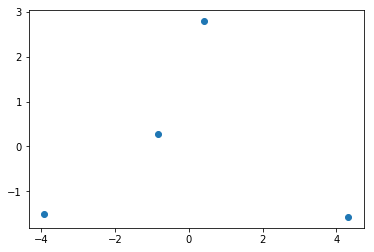

In [160]:
##### Your Code Here #####
df_cov = df_std.cov()
val, vec = np.linalg.eig(df_cov)

idx = val.argsort()[::-1]   
val = val[idx]
vec = vec[:,idx]

P = pd.DataFrame(df_std.dot(vec)) #has imagenary values, all very close to 0, only appears at PCA 6+
plt.scatter(P[0], P[1])

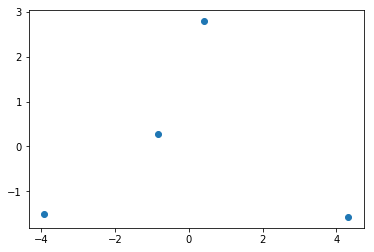

In [161]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(df_std)
P = pd.DataFrame(pca.transform(df_std))
plt.scatter(P[0], P[1])

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [163]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [164]:
p_std = standardize(points)

In [165]:
from sklearn.cluster import KMeans 

In [166]:
ssqd = []
K = range(1,15)
for n in K:
    km = KMeans(n_clusters=n)
    km = km.fit(p_std)
    ssqd.append(km.inertia_)

In [167]:
change_in = []
for i in range(len(ssqd) - 1):
    change_in.append(ssqd[i] - ssqd[i + 1])

In [170]:
km = KMeans(n_clusters=5)
km = km.fit(p_std)
p_std['cluster'] = pd.Series(km.labels_)

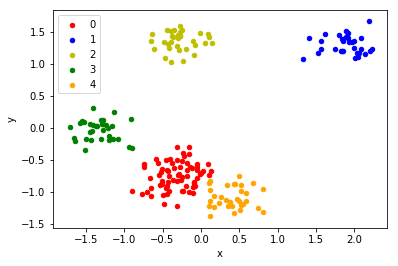

In [171]:
colors = {0: 'r', 1: 'b', 2: 'y', 3: 'green', 4: 'orange'}
fig, ax = plt.subplots()
groups = p_std.groupby('cluster')
for key, group in groups:
    group.plot(ax = ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

# STRETCH GOAL

USING PCA TO CLUSTER DATASET

In [172]:
pca = PCA(2)
pca.fit(p_std)
X = pd.DataFrame(pca.transform(p_std))

In [173]:
km = KMeans(n_clusters=5)
km = km.fit(X)
X['cluster'] = pd.Series(km.labels_)

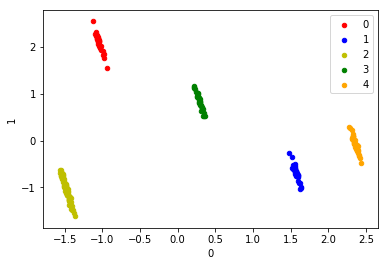

In [175]:
colors = {0: 'r', 1: 'b', 2: 'y', 3: 'green', 4: 'orange'}
fig, ax = plt.subplots()
groups = X.groupby('cluster')
for key, group in groups:
    group.plot(ax = ax, kind='scatter', x=0, y=1, label=key, color=colors[key])